In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#  load dataset
df = pd.read_csv("online_retail.csv")

df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [3]:
#  datacleaning
df = df.dropna(subset=['CustomerID'])
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

df['TotalAmount'] = df['Quantity'] * df['UnitPrice']


In [4]:
#  Customer Level Aggregation

customer_df = df.groupby('CustomerID').agg({
    'InvoiceDate': 'nunique',      # visit frequency
    'Quantity': 'sum',             # total items bought
    'TotalAmount': 'sum'           # total spend
}).reset_index()

customer_df.columns = [
    'CustomerID',
    'PurchaseDays',
    'TotalQuantity',
    'TotalSpend'
]

customer_df.head()


,CustomerID,PurchaseDays,TotalQuantity,TotalSpend
0,12346.0,2,0,0.00
1,12347.0,7,2458,4310.00
2,12348.0,4,2341,1797.24
3,12349.0,1,631,1757.55
4,12350.0,1,197,334.40


In [5]:
# Define Normal Behavior
qty_mean = customer_df['TotalQuantity'].mean()
spend_mean = customer_df['TotalSpend'].mean()

qty_std = customer_df['TotalQuantity'].std()
spend_std = customer_df['TotalSpend'].std()


In [6]:
# Detect Pattern Breakers
customer_df['pattern_breaker'] = np.where(
    (customer_df['TotalQuantity'] > qty_mean + 2*qty_std) |
    (customer_df['TotalSpend'] > spend_mean + 2*spend_std),
    1, 0
)

In [7]:
# Tag Customer Type
customer_df['customer_type'] = np.where(
    customer_df['pattern_breaker'] == 1,
    'Pattern Breaker',
    'Normal Customer'
)

In [8]:
# Quick Analysis
customer_df['customer_type'].value_counts()
customer_df.groupby('customer_type')[['TotalSpend','TotalQuantity']].mean()

,TotalSpend,TotalQuantity
customer_type,,
Normal Customer,1331.540089,788.847524
Pattern Breaker,50902.991000,29949.780000


**Visualization**

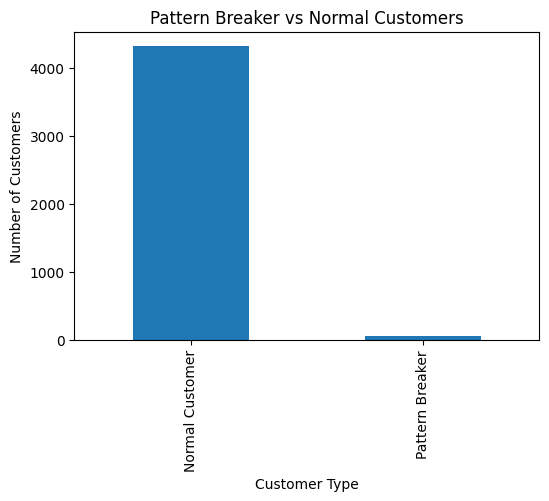

In [9]:
# A. Customer Type Distribution
plt.figure(figsize=(6,4))
customer_df['customer_type'].value_counts().plot(kind='bar')
plt.title("Pattern Breaker vs Normal Customers")
plt.xlabel("Customer Type")
plt.ylabel("Number of Customers")
plt.show()

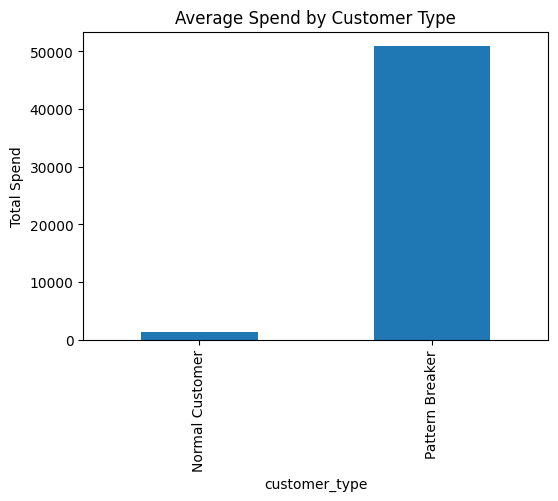

In [10]:
# B. Spend Comparison
plt.figure(figsize=(6,4))
customer_df.groupby('customer_type')['TotalSpend'].mean().plot(kind='bar')
plt.title("Average Spend by Customer Type")
plt.ylabel("Total Spend")
plt.show()

In [11]:
# Save Results
customer_df.to_csv("pattern_breaker_customers.csv", index=False)